In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import (
    KMeans,
)  # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl  # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## Importing & Slicing

In [360]:
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_mbs_sa3_service_1_np = pd.read_pickle(
    os.path.join(
        path, "clean_datasets/2014-22_combined_service_1_categories_no_pivot.pkl"
    )
)
df_mbs_sa3_service_1_np.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103592 entries, 0 to 229389
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            103592 non-null  int64  
 1   StateTerritory                  103592 non-null  object 
 2   GeographicCode                  103592 non-null  object 
 3   GeographicAreaName              103592 non-null  object 
 4   GeographicGroup                 103592 non-null  object 
 5   ServiceLevel                    103592 non-null  object 
 6   Service                         103592 non-null  object 
 7   DemographicGroup                103592 non-null  object 
 8   MBS_per_100                     103592 non-null  float64
 9   No_of_patients                  103592 non-null  Int32  
 10  No_of_services                  103592 non-null  Int64  
 11  %_People_had_service            103592 non-null  float64
 12  Services_100_peo

In [361]:
# Calculating medicare rebate per person per year
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] == 0, "MBS_per_person"
] = 0
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] != 0, "MBS_per_person"
] = (
    df_mbs_sa3_service_1_np["Total_mbs_paid_$"]
    / df_mbs_sa3_service_1_np["No_of_patients"]
)

df_mbs_sa3_service_1_np["Total_Provider_pp_per_service"] = df_mbs_sa3_service_1_np[
    "Total_provider_fees_$"
] / (
    df_mbs_sa3_service_1_np["No_of_patients"]
    * df_mbs_sa3_service_1_np["No_of_service_per_person"]
)
df_mbs_sa3_service_1_np["MBS_Rebate_pp_per_service"] = df_mbs_sa3_service_1_np[
    "Total_mbs_paid_$"
] / (
    df_mbs_sa3_service_1_np["No_of_patients"]
    * df_mbs_sa3_service_1_np["No_of_service_per_person"]
)

### Extracting All Person Dataset

In [362]:
df_mbs_sa3_all_person = df_mbs_sa3_service_1_np[
    df_mbs_sa3_service_1_np["Population_demographic"] == "All persons"
]
df_mbs_sa3_all_person.shape

(14860, 55)

In [363]:
df_mbs_sa3_all_person.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [364]:
""" df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "No_of_patients",
        "No_of_services",
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_Pocket",
        "ERP",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
        "negative_income",
        "no_income_or_not_applicable",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
        "Population",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "MBS_per_person",
    ]
] """

' df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[\n    [\n        "No_of_patients",\n        "No_of_services",\n        "Total_mbs_paid_$",\n        "Total_provider_fees_$",\n        "Out_of_Pocket",\n        "ERP",\n        "Out_of_pocket_cost_per_person",\n        "No_of_service_per_person",\n        "Out_of_pocket_cost_per_service",\n        "negative_income",\n        "no_income_or_not_applicable",\n        "average_income_$5200",\n        "average_income_$13000",\n        "average_income_$18200",\n        "average_income_$26000",\n        "average_income_$36400",\n        "average_income_$46800",\n        "average_income_$58500",\n        "average_income_$71500",\n        "average_income_$91000",\n        "average_income_$130000",\n        "average_income_$169000+",\n        "Population",\n        "%_out_of_pocket_by_$5200",\n        "%_out_of_pocket_by_$13000",\n        "%_out_of_pocket_by_$18200",\n        "%_out_of_pocket_by_$26000",\n        "%_out_of_pocket_by_$36400",\n   

In [365]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
    ]
]

## All Personal Data Slice

### Data Standardization

Used sklearnt normalized function to standardize the numbers

In [366]:
scaler = MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(df_mbs_sa3_numerical_val)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

       Total_mbs_paid_$  Total_provider_fees_$  Out_of_pocket_cost_per_person  \
0              0.033920               0.040280                       0.086507   
1              0.074271               0.095450                       0.263740   
2              0.184186               0.229392                       0.210949   
3              0.000744               0.000737                       0.002991   
4              0.048211               0.075199                       0.399510   
...                 ...                    ...                            ...   
14855          0.020124               0.024812                       0.104166   
14856          0.067261               0.078889                       0.242908   
14857          0.142491               0.162843                       0.167143   
14858          0.002863               0.003582                       0.041140   
14859          0.027521               0.043539                       0.391857   

       No_of_service_per_pe

In [367]:
""" d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df) """

' d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)\nscaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)\nprint(scaled_df) '

### The elbow technique

In [368]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [369]:
score = [
    kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-1977.6041793759318,
 -1188.0370270832648,
 -485.61174381333825,
 -386.70784756989707,
 -293.024388307976,
 -231.35605777113892,
 -204.07867619041173,
 -180.03325265580878,
 -161.08675276564287]

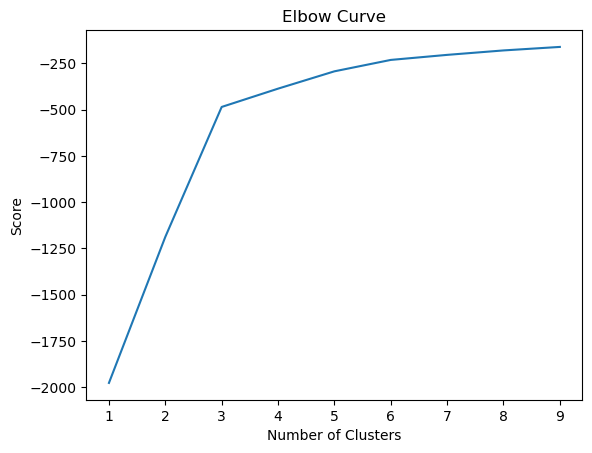

In [370]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### k-means clustering

In [371]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [372]:
scaled_df["clusters"] = kmeans.fit_predict(scaled_df)

In [373]:
scaled_df.head()

,Total_mbs_paid_$,Total_provider_fees_$,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,clusters
0,0.033920,0.040280,0.086507,0.084005,0.179675,1
1,0.074271,0.095450,0.263740,0.112688,0.480502,0
2,0.184186,0.229392,0.210949,0.484270,0.149373,2
3,0.000744,0.000737,0.002991,0.057046,0.006525,1
4,0.048211,0.075199,0.399510,0.163973,0.596210,0


In [374]:
scaled_df["clusters"].value_counts()

1    8567
0    3414
2    2879
Name: clusters, dtype: int64

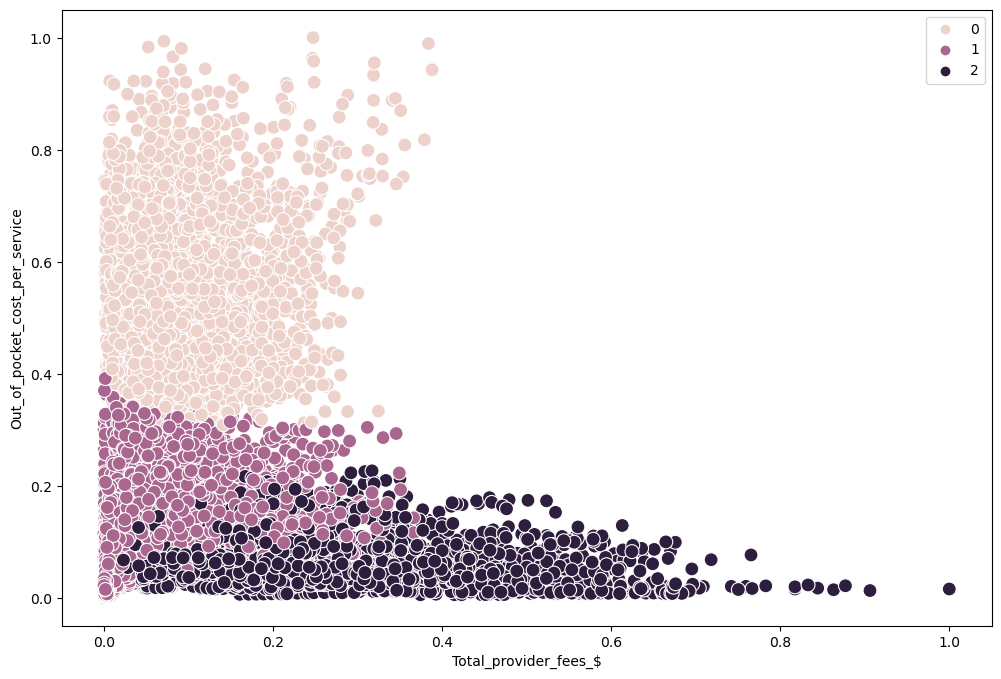

In [375]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=scaled_df["Total_provider_fees_$"],
    y=scaled_df["Out_of_pocket_cost_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_provider_fees_$")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()

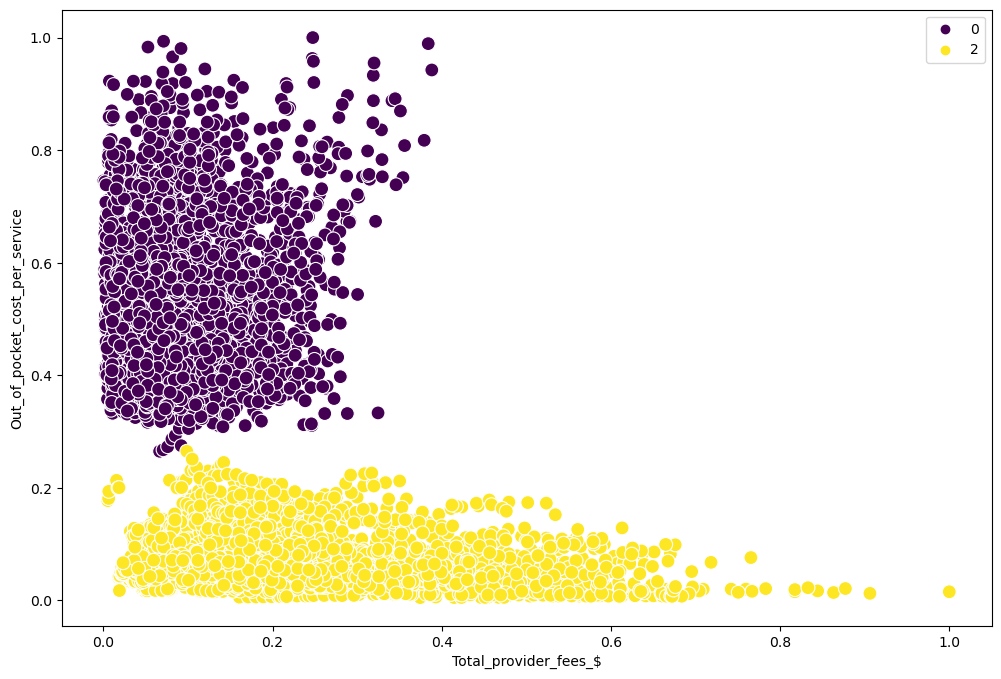

In [376]:
# Define the cluster labels you want to keep
clusters_to_keep = [2, 0]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = scaled_df[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["Total_provider_fees_$"],
    y=filtered_df["Out_of_pocket_cost_per_service"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_provider_fees_$")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()

No obvious clusters

In [377]:
df_mbs_sa3_service_1_np["Population_demographic"].unique()

array(['0-24', '25-44', '45-64', '65+', 'All persons', 'Females', 'Males'],
      dtype=object)

## Gender Data Slice

### Extract 2022 All person data

In [378]:
df_mbs_sa3_gender = df_mbs_sa3_service_1_np[
    (df_mbs_sa3_service_1_np["Population_demographic"].isin(["Females", "Males"]))
]
df_mbs_sa3_gender.shape

(29715, 55)

In [379]:
df_mbs_sa3_gender.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [380]:
df_mbs_sa3_numerical_val = df_mbs_sa3_gender[
    [
        "No_of_patients",
        "No_of_services",
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_Pocket",
        "ERP",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
        "negative_income",
        "no_income_or_not_applicable",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
        "Population",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "MBS_per_person",
    ]
]

### Data Standardization

Used sklearnt normalized function to standardize the numbers

In [381]:
scaler = MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(df_mbs_sa3_numerical_val)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

       No_of_patients  No_of_services  Total_mbs_paid_$  \
0            0.123246        0.025240          0.037750   
1            0.084475        0.015218          0.021829   
2            0.130258        0.030576          0.079201   
3            0.085964        0.017500          0.051239   
4            0.312619        0.198680          0.191632   
...               ...             ...               ...   
29710        0.171936        0.101576          0.109938   
29711        0.027768        0.005431          0.003401   
29712        0.021348        0.003659          0.001639   
29713        0.054777        0.014278          0.025300   
29714        0.051155        0.013184          0.023043   

       Total_provider_fees_$  Out_of_Pocket       ERP  \
0                   0.045096       0.050642  0.318986   
1                   0.025498       0.025775  0.315183   
2                   0.104784       0.168537  0.318986   
3                   0.062485       0.076524  0.315183   
4     

In [382]:
""" d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df) """

' d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)\nscaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)\nprint(scaled_df) '

### The elbow technique

In [383]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [384]:
score = [
    kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-23478.161591311207,
 -16212.81207176503,
 -10817.841884604602,
 -9278.948518942212,
 -8247.892657705781,
 -7319.46416006921,
 -6675.146905613436,
 -6115.285697672334,
 -5620.091730107214]

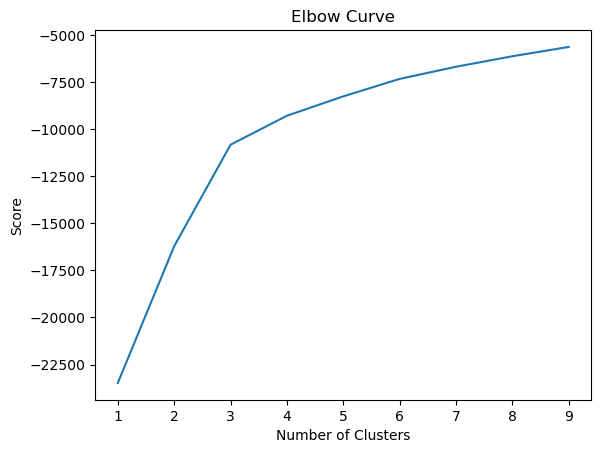

In [385]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### k-means clustering

In [386]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [387]:
scaled_df["clusters"] = kmeans.fit_predict(scaled_df)

In [388]:
scaled_df.head()

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,negative_income,...,%_out_of_pocket_by_$26000,%_out_of_pocket_by_$36400,%_out_of_pocket_by_$46800,%_out_of_pocket_by_$58500,%_out_of_pocket_by_$71500,%_out_of_pocket_by_$91000,%_out_of_pocket_by_$130000,%_out_of_pocket_by_$169000+,MBS_per_person,clusters
0,0.123246,0.025240,0.037750,0.045096,0.050642,0.318986,0.098840,0.172447,0.170328,0.13,...,0.098842,0.098378,0.098611,0.098958,0.099788,0.097297,0.096525,0.100503,0.229563,0
1,0.084475,0.015218,0.021829,0.025498,0.025775,0.315183,0.074719,0.151701,0.145104,0.13,...,0.074131,0.074595,0.075000,0.074653,0.076433,0.075676,0.073359,0.075377,0.193673,0
2,0.130258,0.030576,0.079201,0.104784,0.168537,0.318986,0.299464,0.197663,0.450706,0.13,...,0.299614,0.299459,0.298611,0.298611,0.299363,0.300000,0.297297,0.301508,0.455710,1
3,0.085964,0.017500,0.051239,0.062485,0.076524,0.315183,0.207652,0.171419,0.359414,0.13,...,0.207722,0.207568,0.206944,0.206597,0.208068,0.208108,0.204633,0.206030,0.446728,0
4,0.312619,0.198680,0.191632,0.239480,0.321421,0.318986,0.239197,0.535159,0.139531,0.13,...,0.239382,0.238919,0.238889,0.237847,0.239915,0.237838,0.239382,0.241206,0.459427,2


In [389]:
scaled_df["clusters"].value_counts()

0    17711
1     6107
2     5897
Name: clusters, dtype: int64

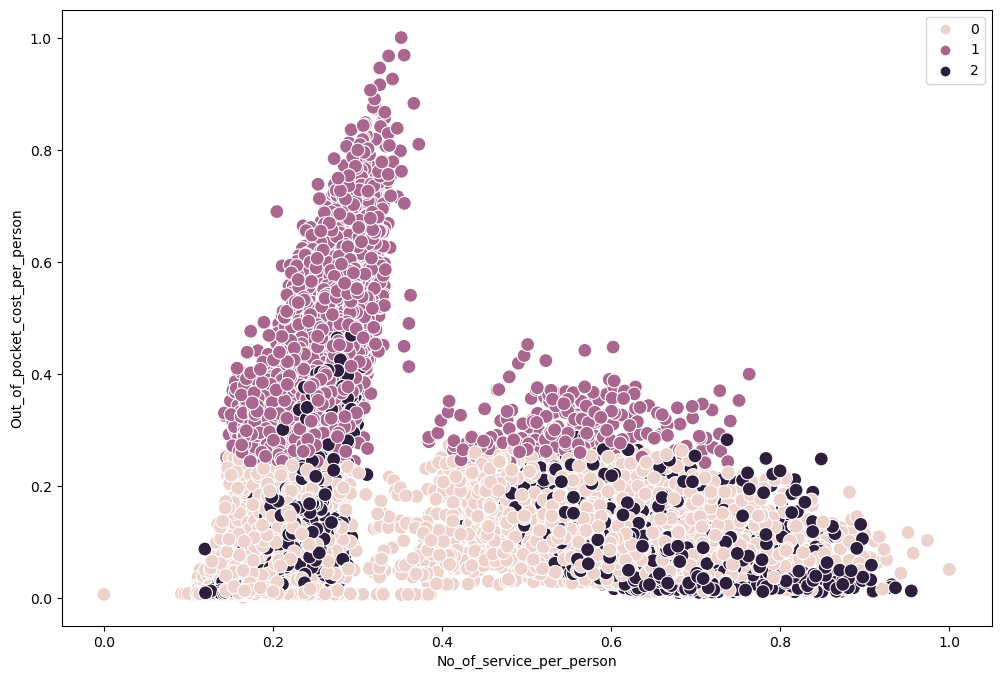

In [390]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=scaled_df["No_of_service_per_person"],
    y=scaled_df["Out_of_pocket_cost_per_person"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()

## GP Service Data Slice

### Extract 2022 GP Services

In [391]:
df_mbs_sa3_service_1_np["Service"].unique()

array(['Allied Health attendances (total)', 'Diagnostic Imaging (total)',
       'GP attendances (total)',
       'Nursing and Aboriginal Health Workers (total)',
       'Specialist attendances (total)'], dtype=object)

In [392]:
df_mbs_sa3_all_person_gp = df_mbs_sa3_service_1_np[
    (df_mbs_sa3_service_1_np["Population_demographic"].isin(["All persons"]))
    & (df_mbs_sa3_service_1_np["Service"] == "GP attendances (total)")
]
df_mbs_sa3_all_person_gp.shape

(2972, 55)

In [393]:
df_mbs_sa3_all_person_gp.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [394]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person_gp[
    [
        "No_of_patients",
        "No_of_services",
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_Pocket",
        "ERP",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
        "negative_income",
        "no_income_or_not_applicable",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
        "Population",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "MBS_per_person",
    ]
]

### Data Standardization

Used sklearnt normalized function to standardize the numbers

In [395]:
scaler = MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(df_mbs_sa3_numerical_val)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

      No_of_patients  No_of_services  Total_mbs_paid_$  Total_provider_fees_$  \
0           0.292901        0.188876          0.181335               0.225790   
1           0.000000        0.000000          0.000000               0.000000   
2           0.171495        0.100140          0.094326               0.121372   
3           0.135434        0.077421          0.078430               0.106592   
4           0.076656        0.043111          0.042760               0.062084   
...              ...             ...               ...                    ...   
2967        0.069110        0.035710          0.038714               0.048545   
2968        0.044328        0.030744          0.031137               0.036604   
2969        0.020285        0.013881          0.018355               0.018688   
2970        0.107788        0.075960          0.083078               0.089585   
2971        0.174045        0.126582          0.139495               0.158930   

      Out_of_Pocket       E

In [396]:
""" d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df) """

' d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)\nscaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)\nprint(scaled_df) '

### The elbow technique

In [397]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [398]:
score = [
    kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-2537.212432115779,
 -1655.4320431819663,
 -1091.1844885385324,
 -916.7413984157242,
 -785.3611486528969,
 -675.2727006339685,
 -617.6425102051473,
 -569.2836615516258,
 -524.4881563849779]

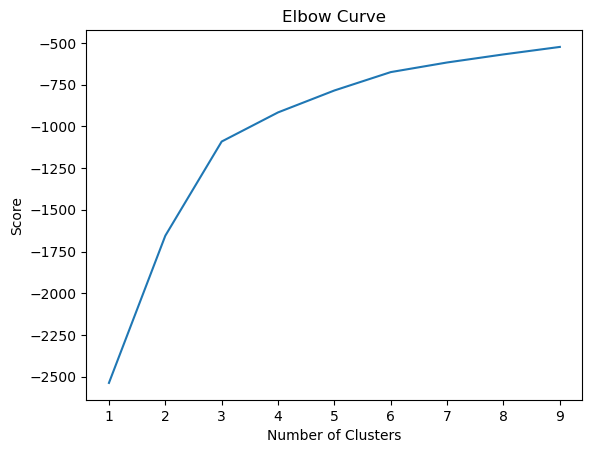

In [399]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### k-means clustering

In [400]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [401]:
scaled_df["clusters"] = kmeans.fit_predict(scaled_df)

In [402]:
scaled_df.head()

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,negative_income,...,%_out_of_pocket_by_$26000,%_out_of_pocket_by_$36400,%_out_of_pocket_by_$46800,%_out_of_pocket_by_$58500,%_out_of_pocket_by_$71500,%_out_of_pocket_by_$91000,%_out_of_pocket_by_$130000,%_out_of_pocket_by_$169000+,MBS_per_person,clusters
0,0.292901,0.188876,0.181335,0.225790,0.440417,0.319219,0.508639,0.259599,0.479640,0.129208,...,0.508772,0.508197,0.508772,0.508772,0.510753,0.506849,0.504854,0.506329,0.181971,2
1,0.000000,0.000000,0.000000,0.000000,0.008701,0.000017,0.659807,0.211820,0.657849,0.000455,...,0.660819,0.661202,0.659649,0.662281,0.661290,0.657534,0.660194,0.658228,0.158405,2
2,0.171495,0.100140,0.094326,0.121372,0.268436,0.191134,0.524451,0.179788,0.545313,0.070974,...,0.524366,0.524590,0.522807,0.526316,0.526882,0.520548,0.524272,0.518987,0.104528,2
3,0.135434,0.077421,0.078430,0.106592,0.275551,0.169083,0.678579,0.164261,0.718614,0.066424,...,0.678363,0.677596,0.677193,0.679825,0.682796,0.678082,0.679612,0.670886,0.137179,2
4,0.076656,0.043111,0.042760,0.062084,0.189795,0.082161,0.805516,0.154169,0.863581,0.025023,...,0.807018,0.806011,0.807018,0.807018,0.806452,0.808219,0.805825,0.797468,0.114999,2


In [403]:
scaled_df["clusters"].value_counts()

0    1736
1     671
2     565
Name: clusters, dtype: int64

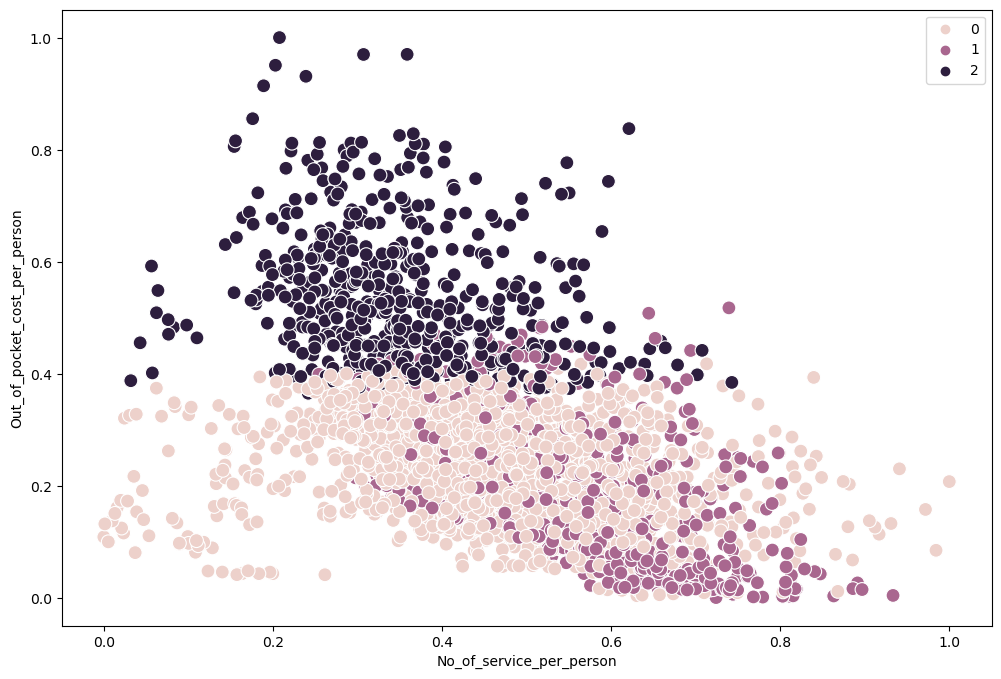

In [404]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=scaled_df["No_of_service_per_person"],
    y=scaled_df["Out_of_pocket_cost_per_person"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()

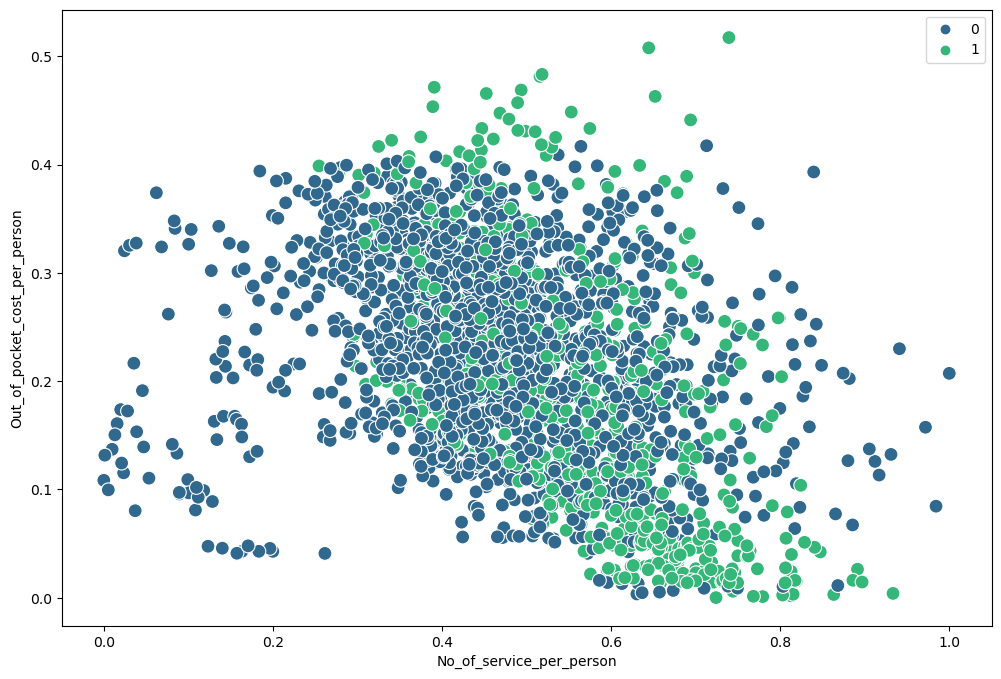

In [405]:
# Define the cluster labels you want to keep
clusters_to_keep = [0, 1]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = scaled_df[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["No_of_service_per_person"],
    y=filtered_df["Out_of_pocket_cost_per_person"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()

## Analysing Per Person Dataset 

### Extracting Data

In [436]:
df_mbs_sa3_all_person.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [437]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "MBS_Rebate_pp_per_service",
        "Total_Provider_pp_per_service",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
    ]
]

### Data Standardization

In [438]:
scaler = MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(df_mbs_sa3_numerical_val)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

       MBS_Rebate_pp_per_service  Total_Provider_pp_per_service  \
0                       0.347102                       0.330768   
1                       0.703649                       0.716807   
2                       0.198329                       0.206537   
3                       0.077434                       0.059836   
4                       0.434928                       0.558371   
...                          ...                            ...   
14855                   0.315070                       0.315092   
14856                   0.868813                       0.798856   
14857                   0.237834                       0.219664   
14858                   0.083211                       0.096388   
14859                   0.429791                       0.560839   

       Out_of_pocket_cost_per_person  No_of_service_per_person  \
0                           0.086507                  0.084005   
1                           0.263740                  0.112688 

### The elbow technique

In [439]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [440]:
score = [
    kmeans[i].fit(df_mbs_sa3_numerical_val).score(df_mbs_sa3_numerical_val)
    for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-106419874.31274982,
 -40803962.13608903,
 -21671383.46668775,
 -13142578.017233215,
 -9356812.409339787,
 -7707042.747992815,
 -6107138.973668613,
 -5142908.906961805,
 -4395581.242246026]

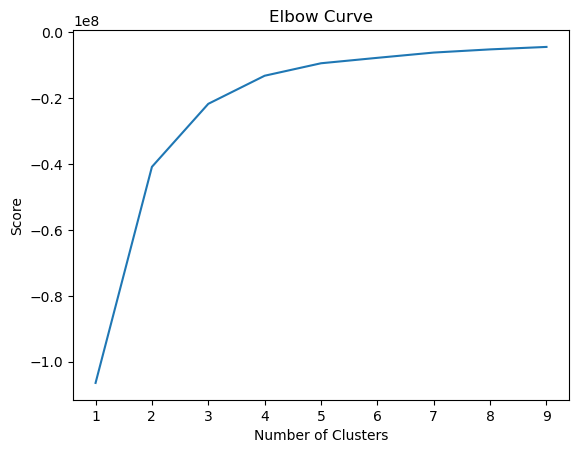

In [441]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

### 3. k-means clustering

In [442]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [443]:
df_mbs_sa3_numerical_val["clusters"] = kmeans.fit_predict(df_mbs_sa3_numerical_val)

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_58704/232422613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbs_sa3_numerical_val["clusters"] = kmeans.fit_predict(df_mbs_sa3_numerical_val)


In [444]:
df_mbs_sa3_numerical_val.head()

,MBS_Rebate_pp_per_service,Total_Provider_pp_per_service,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,clusters
4,68.944781,83.663943,28.081822,1.907841,14.719162,1
11,127.027326,166.823488,86.673643,2.177940,39.796162,0
18,44.709134,56.902358,69.221382,5.677037,12.193224,1
25,25.014943,25.300359,0.472071,1.653979,0.285415,1
32,83.251933,132.693542,131.558149,2.660879,49.441608,2


In [445]:
df_mbs_sa3_numerical_val["clusters"].value_counts()

1    8806
2    3079
0    2975
Name: clusters, dtype: int64

In [446]:
df_mbs_sa3_numerical_val.columns

Index(['MBS_Rebate_pp_per_service', 'Total_Provider_pp_per_service',
       'Out_of_pocket_cost_per_person', 'No_of_service_per_person',
       'Out_of_pocket_cost_per_service', 'clusters'],
      dtype='object')

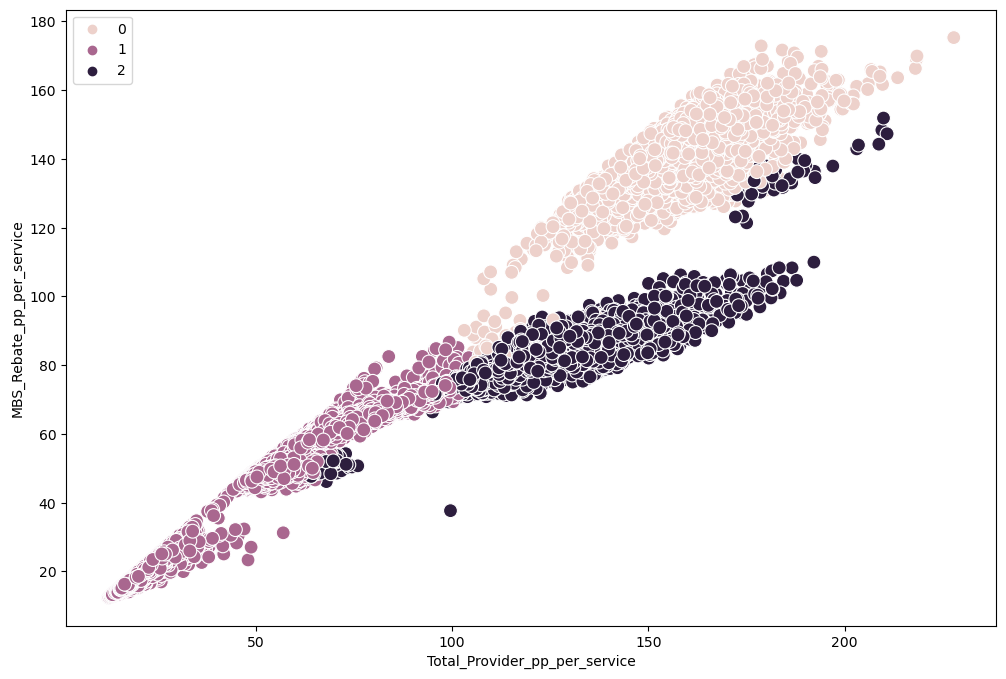

In [447]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Total_Provider_pp_per_service"],
    y=df_mbs_sa3_numerical_val["MBS_Rebate_pp_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_Provider_pp_per_service")  # Label x-axis.
plt.ylabel("MBS_Rebate_pp_per_service")  # Label y-axis.
plt.show()

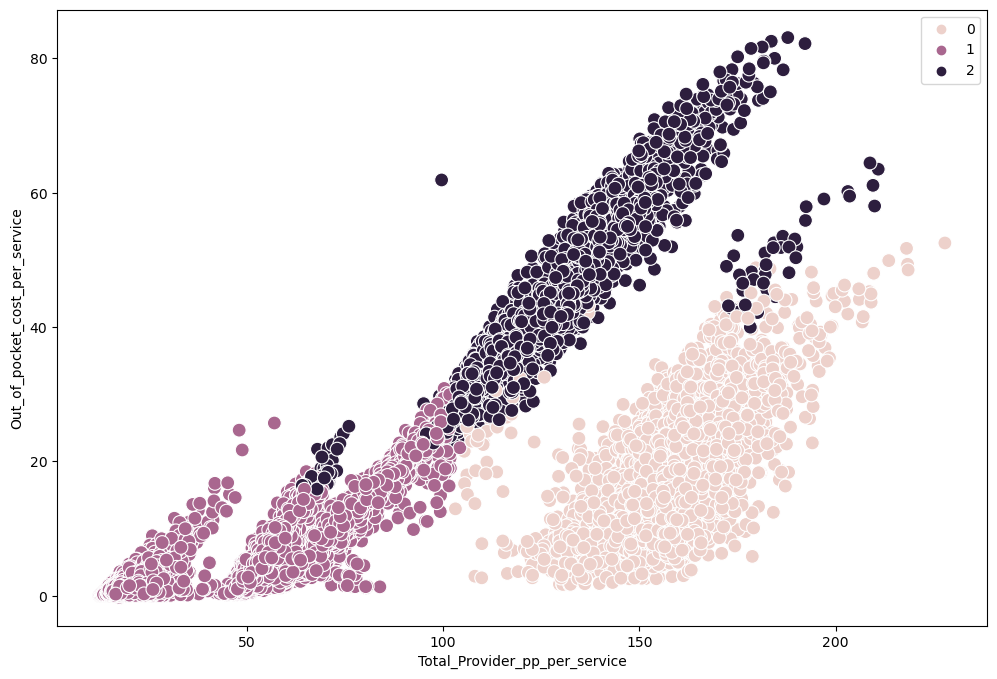

In [448]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Total_Provider_pp_per_service"],
    y=df_mbs_sa3_numerical_val["Out_of_pocket_cost_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_Provider_pp_per_service")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()

    Cluster 0: Service / Areas with provider fees over 125-220, have OOP per service between 0-$50
    Clusters 1: Services / Areas with provider fees between $10 -100 have OOP per service less than $30
    Cluster 2: Services / Areas with provider fees more than 100-200, have OOP per service is between 20-80

In [449]:
df_mbs_sa3_numerical_val.columns

Index(['MBS_Rebate_pp_per_service', 'Total_Provider_pp_per_service',
       'Out_of_pocket_cost_per_person', 'No_of_service_per_person',
       'Out_of_pocket_cost_per_service', 'clusters'],
      dtype='object')

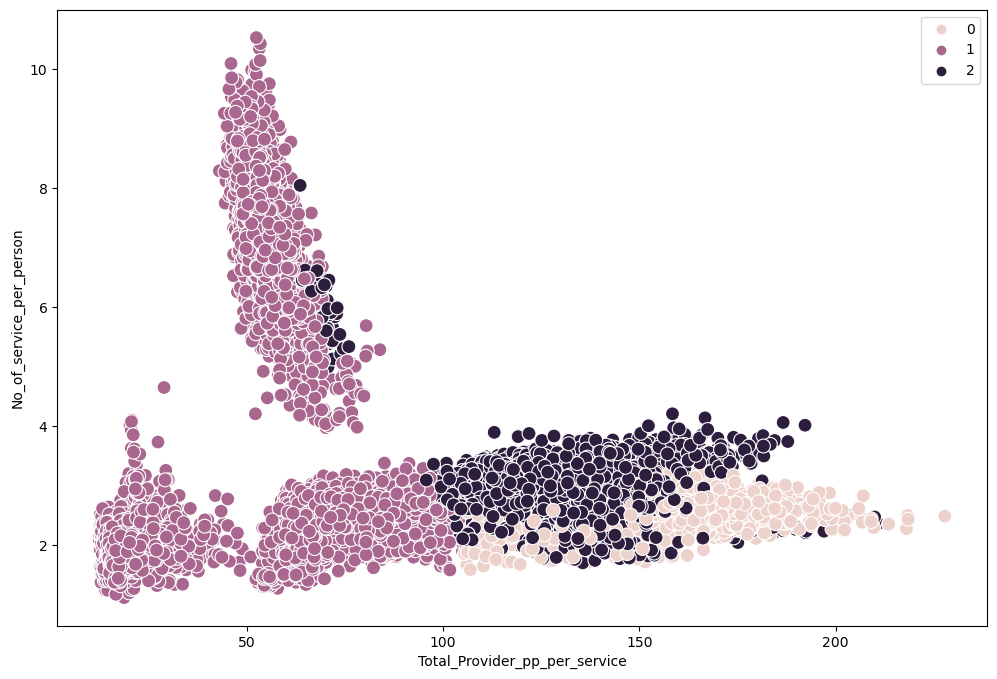

In [450]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["Total_Provider_pp_per_service"],
    y=df_mbs_sa3_numerical_val["No_of_service_per_person"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Total_Provider_pp_per_service")  # Label x-axis.
plt.ylabel("No_of_service_per_person")  # Label y-axis.
plt.show()

    1. Provider fees between 0-100, number of service used is less than 4 (low fees, low usage)
    2. Provider fees between 0-100, number of services used is between 4-10 (low fees, high usage)
    3. Provider fees is more than 100, number of services used is less than 4.

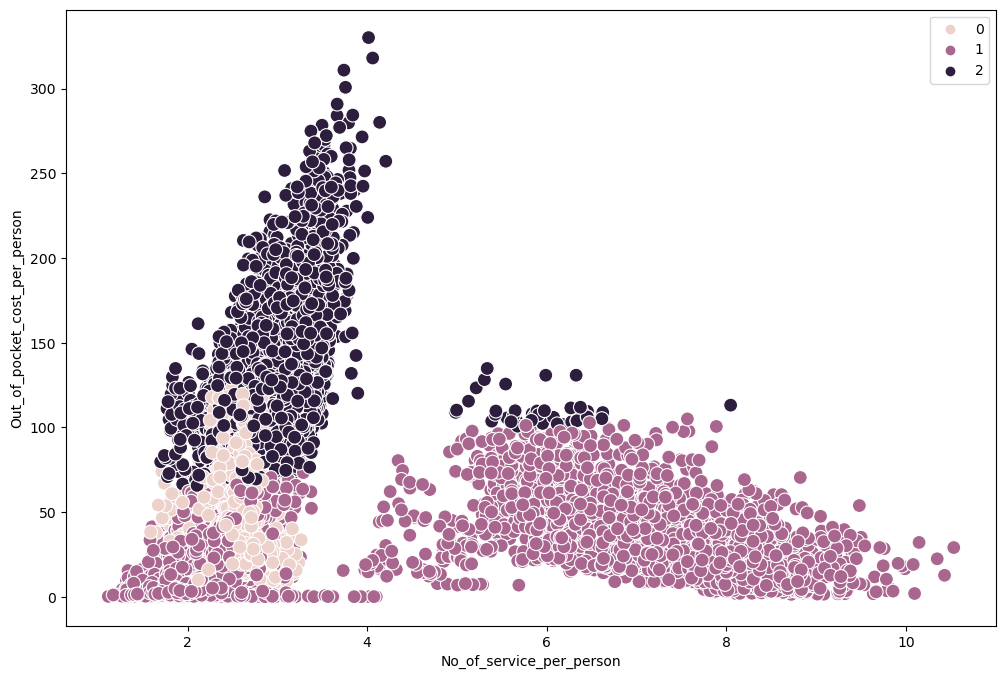

In [451]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_mbs_sa3_numerical_val["No_of_service_per_person"],
    y=df_mbs_sa3_numerical_val["Out_of_pocket_cost_per_person"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()

No useful clusters, except for usage services per person more than 4 and less than 4

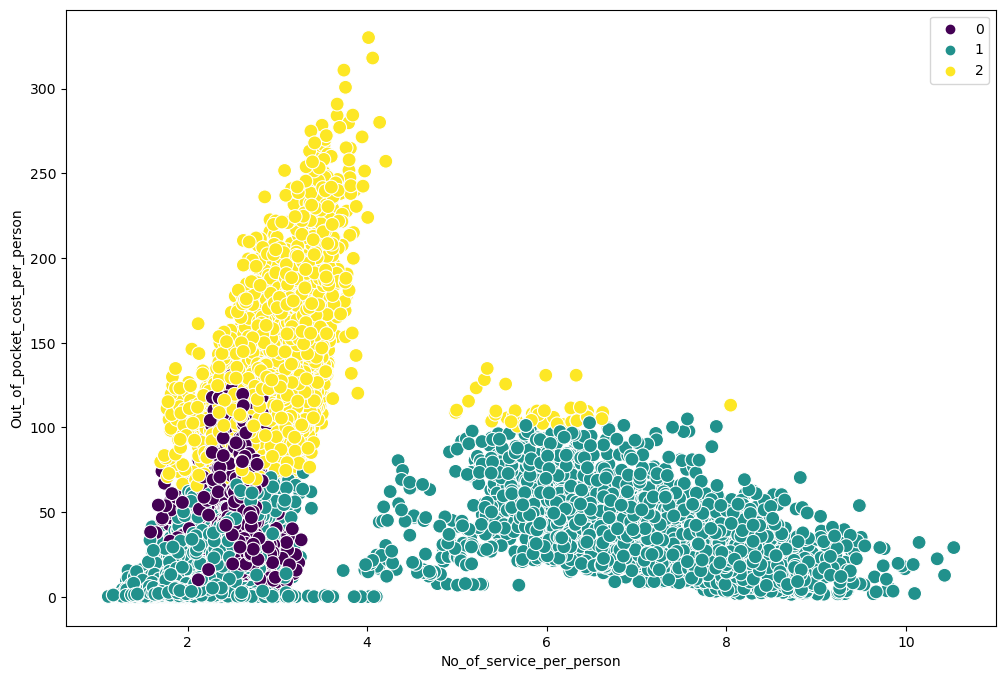

In [452]:
# Define the cluster labels you want to keep
clusters_to_keep = [1, 2, 0]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = df_mbs_sa3_numerical_val[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["No_of_service_per_person"],
    y=filtered_df["Out_of_pocket_cost_per_person"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_person")  # Label y-axis.
plt.show()